In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker

In [2]:
#글씨 지정
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
dc24 = pd.read_csv("dc24_ratio.csv")
# dc24.head()
dc24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   날짜         573 non-null    object 
 1   요일         573 non-null    object 
 2   홈          573 non-null    object 
 3   방문         573 non-null    object 
 4   구장_x       573 non-null    object 
 5   관중수        573 non-null    int64  
 6   지역         573 non-null    object 
 7   구장_y       573 non-null    object 
 8   수용인원(KBO)  573 non-null    object 
 9   좌석수        573 non-null    int64  
 10  점유율        573 non-null    float64
dtypes: float64(1), int64(2), object(8)
memory usage: 49.4+ KB


In [4]:
# # 쉼표를 제거한 후 타입 변환
# dc24['관중수'] = dc24['관중수'].str.replace(',', '')
# dc24['관중수'] = dc24['관중수'].astype(int)

In [5]:
# 관중수 점유율

# dc24['점유율']=(dc24['관중수']/dc24['좌석수'])*100

# dc24.to_csv('dc24_ratio.csv', index=False)
# dc24.head()

In [6]:
filtered_df = dc24[dc24['점유율'] == 100]
count_100 = len(filtered_df)

# 결과 출력
print(f"점유율이 100인 행의 갯수: {count_100}")

점유율이 100인 행의 갯수: 160


In [7]:
# apply 메서드 확인
# dc['관중수'] = dc['관중수'].apply(lambda x: str(x).replace(',', ''))

In [8]:
# "한화"가 포함된 행들만 
team='한화'
hdc24 = dc24[(dc24['홈'] == team) | (dc24['방문'] == team)]

# 결과 출력
hdc24.head()

,날짜,요일,홈,방문,구장_x,관중수,지역,구장_y,수용인원(KBO),좌석수,점유율
0,2024/03/23,토,LG,한화,잠실,23750,잠실,서울종합운동장 야구장,"25,553",23750,100.000000
5,2024/03/24,일,LG,한화,잠실,23750,잠실,서울종합운동장 야구장,"25,553",23750,100.000000
9,2024/03/26,화,SSG,한화,문학,10541,문학,인천 SSG 랜더스필드,"23,000",23000,45.830435
14,2024/03/27,수,SSG,한화,문학,11005,문학,인천 SSG 랜더스필드,"23,000",23000,47.847826
19,2024/03/28,목,SSG,한화,문학,11755,문학,인천 SSG 랜더스필드,"23,000",23000,51.108696


In [51]:
# 한화 홈관중 평균
team='SSG'
hdc24 = dc24[dc24['홈'] == team]

home_avg_crowd = hdc24['관중수'].mean()

print(f"{team} 팀의 홈 관중수 평균은 {home_avg_crowd}명입니다.")

SSG 팀의 홈 관중수 평균은 15640.620689655172명입니다.


In [52]:
# 한화 홈관중 평균
team='KIA'
hdc24 = dc24[dc24['방문'] == team]

home_avg_crowd = hdc24['관중수'].mean()

print(f"{team} 팀의 방문경기 관중수 평균은 {home_avg_crowd}명입니다.")

KIA 팀의 방문경기 관중수 평균은 16468.67213114754명입니다.


In [ ]:
# 한화 홈관중 평균
team='SSG'
hdc24 = dc24[dc24['홈'] == team]

home_avg_crowd = hdc24['관중수'].mean()

print(f"{team} 팀의 홈 관중수 평균은 {home_avg_crowd}명입니다.")

In [60]:
# 각구단 홈경기 평균관중
avg_occupancy_24 = dc24.groupby('홈')['관중수'].mean().reset_index()

print(avg_occupancy_24)

     홈           관중수
0  KIA  17249.163636
1   KT  11828.909091
2   LG  19466.618182
3   NC  10593.092593
4  SSG  15640.620690
5   두산  17472.016667
6   롯데  16561.444444
7   삼성  17604.898305
8   키움  10528.857143
9   한화  11364.616667


In [61]:
# # "한화"가 포함된 행들의 점유율 100인 행의 갯수
# filtered_hdc24= hdc24[dc24['점유율'] == 100]
# count_100 = len(filtered_hdc24)

# # 결과 출력
# print(f"점유율이 100인 행의 갯수: {count_100}")

In [62]:
# #  한화 점유율의 평균
# std_dev = hdc24['점유율'].mean()

# # 결과 출력
# print(f"점유율 평균: {std_dev}")

In [63]:
#  한화 점유율의 표준편차
std_dev = hdc24['점유율'].std()

# 결과 출력
print(f"점유율의 표준편차: {std_dev}")

점유율의 표준편차: 19.601044076562683


In [64]:
stedium='광주'
filtered_df = hdc24[hdc24['구장_x'] == stedium]

# '점유율' 열의 표준편차 계산
std_dev = filtered_df['점유율'].std()

# 결과 출력
print(f"구장이{stedium}일 때 점유율의 표준편차: {std_dev}")

구장이광주일 때 점유율의 표준편차: nan


In [65]:
filtered_df = hdc24[hdc24['구장_x'] != stedium]

# '점유율' 열의 표준편차 계산
std_dev = filtered_df['점유율'].std()

# 결과 출력
print(f"구장이 {stedium}이 아닐 때 점유율의 표준편차: {std_dev}")

구장이 광주이 아닐 때 점유율의 표준편차: 19.601044076562683


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker

In [67]:
hdc_slicing = hdc.iloc[:113].copy()

NameError: name 'hdc' is not defined

In [ ]:
hdc_slicing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113 entries, 0 to 568
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   날짜         113 non-null    object 
 1   요일         113 non-null    object 
 2   홈          113 non-null    object 
 3   방문         113 non-null    object 
 4   구장_x       113 non-null    object 
 5   관중수        113 non-null    float64
 6   지역         113 non-null    object 
 7   구장_y       113 non-null    object 
 8   수용인원(KBO)  113 non-null    object 
 9   좌석수        113 non-null    int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 9.7+ KB


In [ ]:
total_crowd_2023 = hdc_slicing['관중수'].sum()
print(total_crowd_2023)

1616596.0


In [ ]:
hdcc_slicing = hdcc.iloc[:113].copy()

NameError: name 'hdcc' is not defined

In [ ]:
total_crowd_2024 = hdcc_slicing['관중수'].sum()
print(total_crowd_2024)

1616596.0


In [ ]:
avg_total_2023 = total_crowd_2023 / 113

In [ ]:
avg_total_2024 = total_crowd_2024 / 113

In [ ]:
print(f"2023년 한화 113게임 평균 관중수는{avg_total_2023}")
print(f"2024년 한화 113게임 평균 관중수는{avg_total_2024}")

2023년 한화 113게임 평균 관중수는10217.982300884956
2024년 한화 113게임 평균 관중수는14306.159292035398


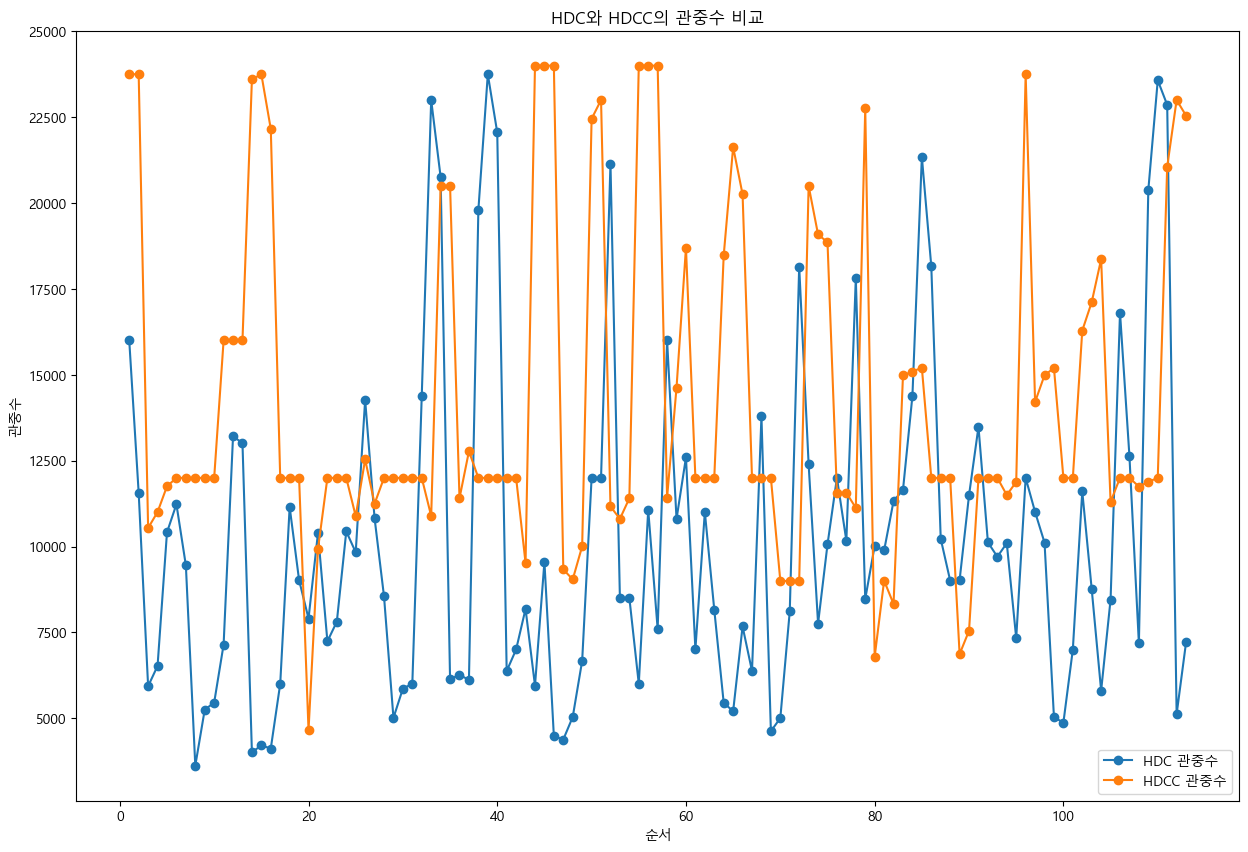

In [ ]:
# x축 값 생성 (각 데이터프레임의 row 순서에 해당)
x_values_hdc = range(1, len(hdc_slicing) + 1)
x_values_hdcc = range(1, len(hdcc_slicing) + 1)

# 꺾은선 그래프 그리기
plt.figure(figsize=(15, 10))

# hdc 데이터프레임의 관중수 그래프
plt.plot(x_values_hdc, hdc_slicing['관중수'], label='HDC 관중수', marker='o')

# hdcc 데이터프레임의 관중수 그래프
plt.plot(x_values_hdcc, hdcc_slicing['관중수'], label='HDCC 관중수', marker='o')

# 그래프 제목과 축 레이블 추가
plt.title('HDC와 HDCC의 관중수 비교')
plt.xlabel('순서')
plt.ylabel('관중수')

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()

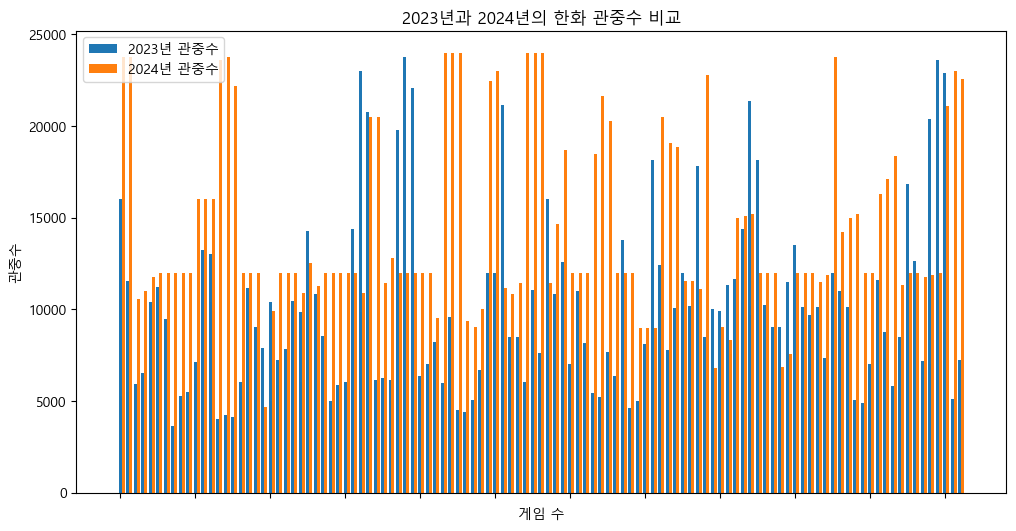

In [ ]:
# x축 값 생성 (각 데이터프레임의 row 순서에 해당)
x_values = np.arange(len(hdc_slicing))

# 막대그래프 그리기
plt.figure(figsize=(12, 6))

# 막대의 너비 설정
bar_width = 0.4

# hdc 데이터프레임의 관중수 그래프
plt.bar(x_values, hdc_slicing['관중수'], width=bar_width, label='2023년 관중수', align='center')

# hdcc 데이터프레임의 관중수 그래프 (약간 오른쪽으로 이동)
plt.bar(x_values + bar_width, hdcc_slicing['관중수'], width=bar_width, label='2024년 관중수', align='center')

# 그래프 제목과 축 레이블 추가
plt.title('2023년과 2024년의 한화 관중수 비교')
plt.xlabel('게임 수')
plt.ylabel('관중수')

# x축의 위치 조정 및 눈금 설정
plt.xticks(x_values + bar_width / 2, x_values + 1)
plt.xticks(np.arange(0,113, step=10))
# 범례 추가
plt.legend()

# 그래프 표시
plt.show()

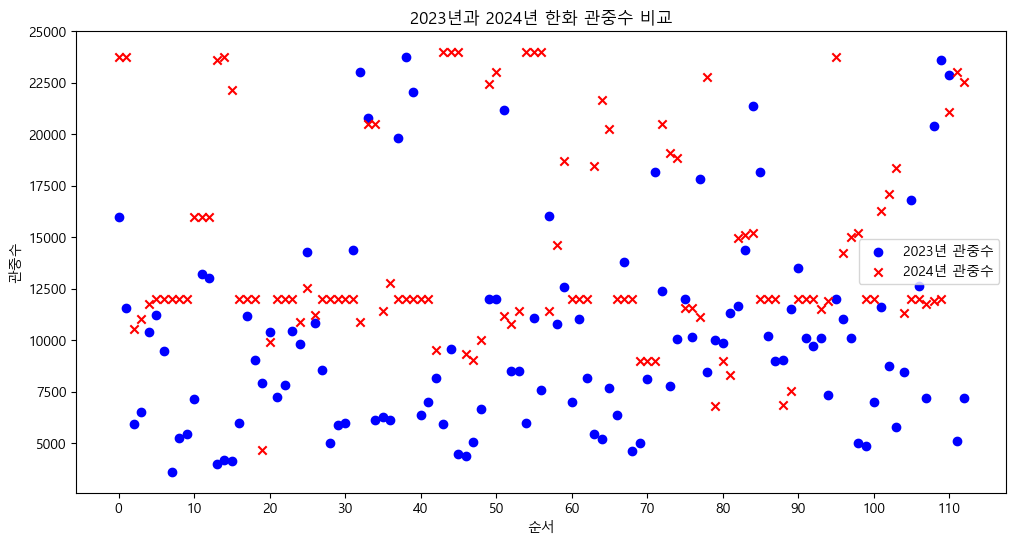

In [ ]:
# 산점도
# 두 데이터프레임의 최소 길이를 계산
min_length = min(len(hdc_slicing), len(hdcc_slicing))

# x축 값 생성
x_values = np.arange(min_length)

# 산점도 그리기
plt.figure(figsize=(12, 6))

# hdc 데이터프레임의 관중수 산점도
plt.scatter(x_values, hdc_slicing['관중수'], color='blue', label='2023년 관중수', marker='o')

# hdcc 데이터프레임의 관중수 산점도
plt.scatter(x_values, hdcc_slicing['관중수'], color='red', label='2024년 관중수', marker='x')

# 그래프 제목과 축 레이블 추가
plt.title('2023년과 2024년 한화 관중수 비교')
plt.xlabel('순서')
plt.ylabel('관중수')

# x축의 눈금 설정
plt.xticks(np.arange(0, min_length, step=10))

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()


In [ ]:
ddc = pd.read_csv("daily_crowd_data_2022.csv")
ddc.head()

,날짜,요일,홈,방문,구장,관중수
0,2022/04/02,토,두산,한화,잠실,"16,271"
1,2022/04/02,토,KIA,LG,광주,"16,908"
2,2022/04/02,토,키움,롯데,고척,"8,257"
3,2022/04/02,토,NC,SSG,창원,"7,814"
4,2022/04/02,토,KT,삼성,수원,"17,057"


In [ ]:
ddc['관중수'] = ddc['관중수'].apply(lambda x: str(x).replace(',', ''))

In [ ]:
# '관중수' 열의 값을 정수형(float)으로 변환
ddc['관중수'] = ddc['관중수'].astype(float)

# 결과 확인
print(ddc)

             날짜 요일    홈   방문  구장      관중수
0    2022/04/02  토   두산   한화  잠실  16271.0
1    2022/04/02  토  KIA   LG  광주  16908.0
2    2022/04/02  토   키움   롯데  고척   8257.0
3    2022/04/02  토   NC  SSG  창원   7814.0
4    2022/04/02  토   KT   삼성  수원  17057.0
..          ... ..  ...  ...  ..      ...
715  2022/10/08  토   롯데   LG  사직  22990.0
716  2022/10/08  토   삼성  SSG  대구  24000.0
717  2022/10/08  토   두산   키움  잠실  23511.0
718  2022/10/10  월   KT   NC  수원  10535.0
719  2022/10/11  화   LG   KT  잠실  10092.0

[720 rows x 6 columns]


In [ ]:
# "한화"가 포함된 행들만 필터링
hddc = ddc[(ddc['홈'] == '한화') | (ddc['방문'] == '한화')]

# 결과 출력
print(hddc)

             날짜 요일    홈   방문  구장      관중수
0    2022/04/02  토   두산   한화  잠실  16271.0
5    2022/04/03  일   두산   한화  잠실  11345.0
10   2022/04/05  화  KIA   한화  광주   2840.0
15   2022/04/06  수  KIA   한화  광주   3117.0
20   2022/04/07  목  KIA   한화  광주   2773.0
..          ... ..  ...  ...  ..      ...
688  2022/09/30  금   한화   롯데  대전   4025.0
695  2022/10/02  일   한화  KIA  대전  11336.0
699  2022/10/03  월   한화  SSG  대전   7023.0
709  2022/10/06  목   한화   키움  대전   9802.0
713  2022/10/08  토   NC   한화  창원  12462.0

[144 rows x 6 columns]


In [ ]:
hddc_slicing = hddc.iloc[:113].copy()

In [ ]:
hddc_slicing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113 entries, 0 to 562
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      113 non-null    object 
 1   요일      113 non-null    object 
 2   홈       113 non-null    object 
 3   방문      113 non-null    object 
 4   구장      113 non-null    object 
 5   관중수     113 non-null    float64
dtypes: float64(1), object(5)
memory usage: 6.2+ KB


In [ ]:
total_crowd_2022 = hddc_slicing['관중수'].sum()
print(total_crowd_2022)

721867.0


In [ ]:
#2023년과 2024년 한화 관중수 증가율
print(total_crowd_2024/total_crowd_2023)

1.4000963077413409


In [ ]:
#2022년과 2023년 한화 관중수 증가율
print(total_crowd_2023/total_crowd_2022)

1.5995079425988443


In [ ]:
ddc_slicing = ddc.iloc[:526].copy()

In [ ]:
total_crowd_2022_all = ddc_slicing['관중수'].sum()
print(total_crowd_2022_all)

4279900.0
